# Проект по курсу "Сложность вычислений"
## Тема: Проверка 3-раскрашиваемости графа (№ 49)
### Студент: Ярослав Спирин (группа 594)

## Формулировка

Требуется имлементировать алгоритм проверки, можно ли покрасить граф из $n$ вершин в $3$ цвета, за время $O(c^n)$ для $c \leq 2$. Реализация алгоритма для $c \gt 1.8$ принесёт не больше $7$ баллов, для меньших $c$ — вплоть до $12$ при выборе наилучшего известного алгоритма.

## Описание работы

В данном проекте мы формально поставим вопрос задачи, опишем алгоритм работы нашей программы, его реализацию, докажем его корректность, оценим время его работы и проведём анализ работы алгоритма на тестах.

## Постановка задачи

Пусть $k$ — натуральное число.

** Опр.  Раскраской ** графа $G = (V , E )$ в $k$ цветов, или просто $k$-раскраской, называется отображение $f$ из множества $V$ в множество $\{1, 2, . . . , k\}$. Если при этом $f (v) = i$ для некоторой вершины $v \in V$, то будем говорить, что вершина $v$ раскрашена в $i$-й цвет.

** Опр. ** Раскраска $f$ графа называется ** правильной **, если $ f(u) \neq f(v)$ для любых двух смежных вершин $u$ и $v$ этого графа. Если существует правильная $k$-раскраска графа $G$, то $G$ называют $k$-**раскрашиваемым**.

Задача заключается в том, чтобы по заданному графу $G = (V , E )$ определять, является он $k$-**раскрашиваемым** или нет. Из курса мы знаем, что задача $3$-раскрашиваемости графа является $NP$-полной, приведём ниже алгоритм, решающий данную задачу за время $O(c^n)$ для $c \leq 2$.

## Описание алгоритма

** Опр. Независимое множество** - множество вершин графа $G = (V, E)$, в котором никакие две вершины из этого множества не соединены ребром, и при этом нельзя добавить еще вершину в этом множество, чтобы оно осталось независимым.

** Алгоритм: ** 

Рассмотрим все максимальные по включению независимые множества $S$ в заданном графе $G = (V, E)$. Не теряя общности, покрасим все вершины множества $S$ в первый цвет. Далее проверим, можем ли мы покрасить все остальные вершины в оставшиеся два цвета. Если найдем хоть одну такую покраску, то ответ - «существует», иначе «не существует».

## Реализация алгоритма

Реализация алгоритма будет представлять собой код на `С++`, и основная идея, используемая в решении этой задачи будет основываться на следующую теорему:

** Теорема. ** 

Либо вершина, либо хотя бы одна из её смежных вершин лежит в максимальном по включению независимом множестве.

** Доказательство: **

Обозначим максимальное по включению независимое множество в графе $G = (V, E)$ через $S$.

Предположим противное: пусть ни рассматриваемая вершина, ни одна из её смежных вершин не лежат во множестве $S$. Это означает, что множество $S$ не является максимальным по включению независимым множеством, поскольку при добавлении рассматриваемой вершины в множество $S$ оно не перестанет быть независимым, но при этом его размер увеличивается на один. Получено противоречие.

** Детали реализации: **


Будем поддерживать некоторое множество $S$, в котором в конечном результате будет находиться максимальное по включению независимое множество.

Рассмотрим вершину $v$ с минимальной степенью. Далее добавим в множество $S$ либо вершину $v$, либо одну из её смежных вершин. По доказанной теореме, множество $S$ будет сохранять свойство независимости. После чего будем производить описанные действия до тех пор, пока будет существовать вершина $u$ не из множества $S$, для которой хотя бы одна смежная с ней вершина не будет содержаться во множестве $S$. В конечном итоге будем получать некоторое максимальное по включению независимое множество. Затем для оставшихся вершин будем проверять, можем ли мы их покрасить в 2 цвета, а это решается методом обхода в глубину исходного графа.

## Корректность алгоритма

Пусть на вход дан граф $G = (V, E)$.

В силу доказанной теоремы алгоритм работает таким образом, что производится перебор всевозможных максимальных по включению независимых множеств $S$ в графе $G$, после чего для каждого из них производится раскраска графа $\overline{S} = G \setminus S$ в два цвета. Откуда следует, что алгоритм рассматривает все допустимые раскаски графа в 3 цвета, а это значит, что алгоритм выполняется корректно.

## Время работы алгоритма

Оценим число максимальных по включению независимых множеств. Заметим, что на каждом шаге можем брать некоторую вершину с минимальной степенью, тогда время работы алгоритма выглядит следующим образом: 

Пусть степень данной вершины равна $d$, тогда $ T(n) \sim (d+1) T(n - (d + 1))$ , где $T(n)$ - время работы программы. Откуда получаем, что $T(n) = (d+1)^{\frac{n}{d+1}}$.

Функция $T(n) = (d+1)^{\frac{n}{d+1}}$ максимальна при $d = 2$, поскольку функция $f(k) = k^{\frac{1}{k}}$, $k \in \mathbb{N}$имеет максимум при $k_{max} = 3$.

Значит, число максимальных по включению независимых множеств не больше, чем $3^{\frac{n}{3}} \sim 1.44^n$. Кроме того, для каждого такого множества мы делаем $2$-раскраску для оставшихся вершин, что занимает $O(n + m)$ методом обхода в глубину.

Итоговая сложность работы программы: $O(1.44^n * (n+m))$, что лучше чем $O(1.8^n)$.

## Анализ результатов выполненных запусков алгоритма

В программе было написано тестирование для реализованного алгоритма:
* Для проверки корректности работы программы, был также написан алгоритм $3$-раскрашиваемости графа за время $O(3^n)$, и проверка - совпадают ли ответы для данных алгоритмов. В результате проверки все ответы совпали.
* Для проверки времени работы программы, алгоритм был протестирован на случайных графах достаточно больших размеров (для данной задачи), где $N$ достигало порядка $\sim 30-40$. В результате проверки программа выдавала ответ в приемлемое для данной сложности время. Кроме того, время работы считалось для серии запусков (а не для одного запуска), что позволило стабилизировать результаты.

Для иллюстрации результатов выполненных запусков алгоритма предлагается взглянуть на график зависимости времени работы $T(n)$ от числа вершин случайного графа $n$.

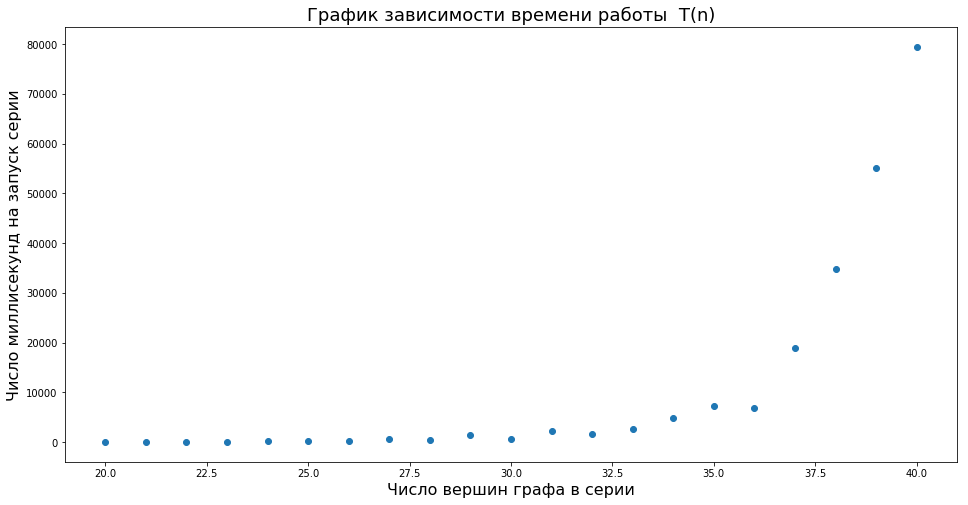

In [13]:
import numpy as np
import matplotlib.pyplot as plt

vertices = np.arange(20, 41)
times = np.array([29, 37, 64, 48, 144, 149, 242, 641, 532, 1395,
                  697, 2283, 1652, 2648, 4829, 7335, 6921, 18927,
                  34832, 55155, 79503])

plt.figure(figsize=(16, 8))
plt.scatter(vertices, times)
plt.title('График зависимости времени работы  T(n)', fontsize=18)
plt.xlabel('Число вершин графа в серии', fontsize=16)
plt.ylabel('Число миллисекунд на запуск серии', fontsize=16)
plt.show()

## Список литературы
* http://www.sci.brooklyn.cuny.edu/~amotz/GC-ALGORITHMS/PRESENTATIONS/coloring.pdf
* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.341.9463&rep=rep1&type=pdf